# Inferential Statistics

Inferential statistics allows us to provide insight on a given topic. There are many types of statistical tests that allows one to make inferences. Some of the common statistical tests are:

* Correlations
* Chi-square test
* Independent t-test (a.k.a Student’s t-test)
* Paired sample t-test
* Welch’s t-test
* Wilcoxon signed-rank test
* Linear regression
* Logistic regression
* One-way Analysis of Variance (ANOVA)
* Two-way/N-way ANOVA

In this section we will investigate if there are any obvious inferential statisticical methods that can help us when modelling the data.

## Import required Libraries

We start, as normal, by importing required libaries.

In [3]:
# Import Pandas
import pandas as pd

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

## Import Dataframes from Pickle files

We load in the exported pickle files of the dataframes created in the Data Acquition Section.

In [4]:
# Import the Pickle of the Crimes DataFrame
df_crimes = pd.read_pickle('./capstone_pickles/crimes.pkl')
df_crimes.drop('index', inplace=True, axis=1)

# Import the Pickle of the Top Venues DataFrame
df_topvnues = pd.read_pickle('./capstone_pickles/top_venues.pkl')

# Import the Pickle of the Restaurants DataFrame
df_rest = pd.read_pickle('./capstone_pickles/restaurants.pkl')

In [5]:
df_crimes.head()

,case,date_of_occurrence,block,primary_description,ward,latitude,longitude,hour,day_name,day,month_name,month,year,year_month,zip,street
0,JB241987,2018-04-28 22:05:00,009XX N LONG AVE,NARCOTICS,37.0,41.897895,-87.760744,22,Saturday,6,April,4,2018,2018-04,009XX,"N, LONG, AVE"
1,JB241350,2018-04-28 08:00:00,008XX E 53RD ST,CRIMINAL DAMAGE,5.0,41.798635,-87.604823,8,Saturday,6,April,4,2018,2018-04,008XX,"E, 53RD, ST"
2,JB245397,2018-04-28 09:00:00,062XX S MICHIGAN AVE,THEFT,20.0,41.780946,-87.621995,9,Saturday,6,April,4,2018,2018-04,062XX,"S, MICHIGAN, AVE"
3,JB241444,2018-04-28 12:15:00,046XX N ELSTON AVE,THEFT,39.0,41.965404,-87.736202,12,Saturday,6,April,4,2018,2018-04,046XX,"N, ELSTON, AVE"
4,JB241667,2018-04-28 16:28:00,022XX S KENNETH AVE,ARSON,22.0,41.850673,-87.735597,16,Saturday,6,April,4,2018,2018-04,022XX,"S, KENNETH, AVE"


In [6]:
df_crimeward_crosstab = pd.crosstab(df_crimes.primary_description, df_crimes.ward)

In [7]:
df_topvnues.head()

,id,score,category,name,address,postalcode,city,href,latitude,longitude
0,42b75880f964a52090251fe3,9.7,Park,Millennium Park,201 E Randolph St,60601,Chicago,/v/millennium-park/42b75880f964a52090251fe3,41.882699,-87.623644
1,4b9511c7f964a520f38d34e3,9.6,Trail,Chicago Lakefront Trail,Lake Michigan Lakefront,60611,Chicago,/v/chicago-lakefront-trail/4b9511c7f964a520f38...,41.967053,-87.646909
2,49e9ef74f964a52011661fe3,9.6,Art Museum,The Art Institute of Chicago,111 S Michigan Ave,60603,Chicago,/v/the-art-institute-of-chicago/49e9ef74f964a5...,41.879665,-87.623630
3,4f2a0d0ae4b0837d0c4c2bc3,9.6,Deli / Bodega,Publican Quality Meats,825 W Fulton Market,60607,Chicago,/v/publican-quality-meats/4f2a0d0ae4b0837d0c4c...,41.886642,-87.648718
4,4aa05f40f964a520643f20e3,9.6,Theater,The Chicago Theatre,175 N State St,60601,Chicago,/v/the-chicago-theatre/4aa05f40f964a520643f20e3,41.885578,-87.627286


Text(0,1,'Scatter Plot of Top Venues Latitude and Score')

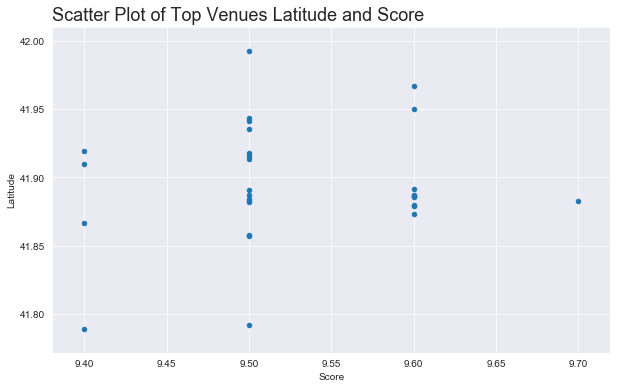

In [17]:
df_topvnues.plot.scatter('score', 'latitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Top Venues Latitude and Score', loc='left', fontsize=18)

Text(0,1,'Scatter Plot of Top Venues Longitude and Score')

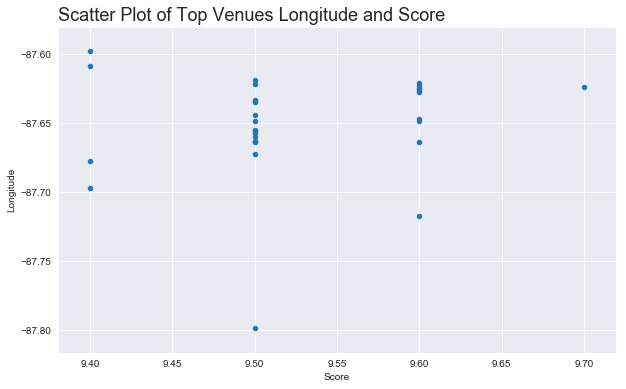

In [16]:
df_topvnues.plot.scatter('score', 'longitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Top Venues Longitude and Score', loc='left', fontsize=18)

In [6]:
df_rest.head()

,id,score,category,categoryID,name,address,postalcode,city,latitude,longitude,venue_name,venue_latitude,venue_longitude
0,55669b9b498ee34e5249ea61,9.2,Gastropubs,4bf58dd8d48988d155941735,Cindy's,12 S Michigan Ave,60603,Chicago,41.881695,-87.624600,Millennium Park,41.882699,-87.623644
1,556509d6498e726bdec19fe9,8.4,Burger Joints,4bf58dd8d48988d16c941735,Shake Shack,12 S Michigan Ave,60603,Chicago,41.881673,-87.624455,Millennium Park,41.882699,-87.623644
2,49e749fbf964a52086641fe3,9.1,Gastropubs,4bf58dd8d48988d155941735,The Gage,24 S Michigan Ave,60603,Chicago,41.881319,-87.624642,Millennium Park,41.882699,-87.623644
3,4ed3dd7e93ad987b5112d29f,8.2,Bakeries,4bf58dd8d48988d16a941735,Panera Bread,2 N Michigan Ave,60602,Chicago,41.882273,-87.624795,Millennium Park,41.882699,-87.623644
4,4a63b5c3f964a5209fc51fe3,8.1,Pizza Places,4bf58dd8d48988d1ca941735,Pizano's Pizza,61 E Madison St.,60603,Chicago,41.882034,-87.625726,Millennium Park,41.882699,-87.623644


Text(0,1,'Scatter Plot of Restaurants Latitude and Score')

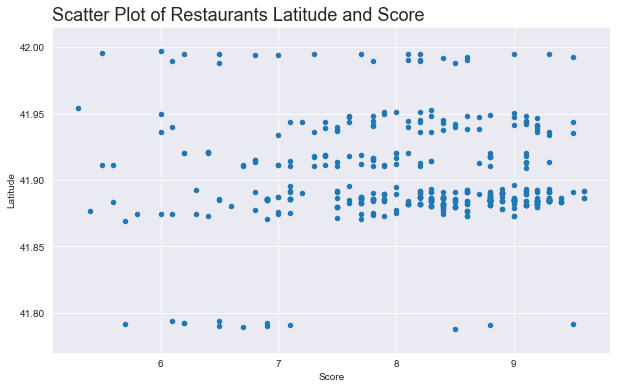

In [18]:
df_rest.plot.scatter('score', 'latitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Restaurants Latitude and Score', loc='left', fontsize=18)

Text(0,1,'Scatter Plot of Restaurants Longitude and Score')

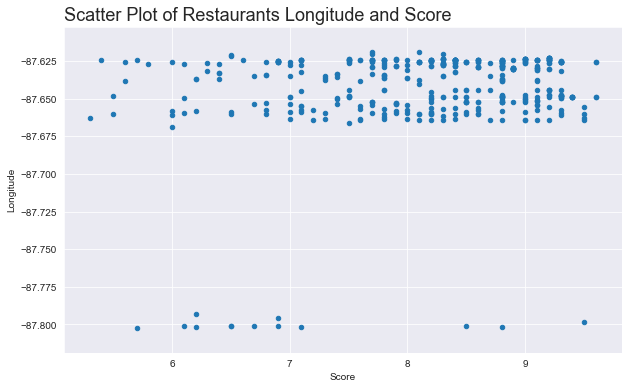

In [19]:
df_rest.plot.scatter('score', 'longitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Restaurants Longitude and Score', loc='left', fontsize=18)